*Задача 1. Инвестор купил акцию 6 лет назад по цене $10. Сейчас он продал ее за $50. Определить, какую доходность принесла ему эта инвестиция в процентах годовых.*

In [75]:
price_purchase = 10
price_sale = 50
years_held = 6

return_rate = ((price_sale / price_purchase) ** (1 / years_held) - 1) * 100

print("Доходность инвестиции:", return_rate, "% годовых")

Доходность инвестиции: 30.76604860118306 % годовых


*Задача 2. Инвестору исполнилось только что 30 лет. Он хочет выйти на пенсию в 60 лет и жить на доход с капитала. Допустим, его целевой уровень капитала к пенсии составляет $350 000. Если он ожидает ставку доходности на рынке порядка 8% годовых, то какую сумму ему надо инвестировать каждый год для достижения цели?*

Для решения этой задачи используем функцию pmt из библиотеки numpy-financial. Функция pmt позволяет вычислить платеж, необходимый для достижения целевой суммы к определенному моменту времени с заданной процентной ставкой.

`pmt = npf.pmt(rate, periods, pv, fv, when)`


In [76]:

import numpy_financial as npf

target_value = 350000  # целевая сумма
age = 30  # возраст инвестора
retirement_age = 60  # возраст пенсии
interest_rate = 0.08  # ставка доходности

investments_needed = npf.pmt(interest_rate, retirement_age - age, 0, -target_value)
print(f"Сумма инвестиций, необходимая каждый год: ${investments_needed:.2f}")



Сумма инвестиций, необходимая каждый год: $3089.60


*Задача 3. Человек взял ипотечный кредит на сумму 8 млн руб., на 20 лет под 10% годовых. Погашение кредита будет происходить ежемесячными аннуитетными платежами. Определить, сколько составит общая переплата (сумма процентов) по кредиту.*

Для решения этой задачи используем функцию npf.ipmt() из библиотеки numpy-financial.

In [77]:

import numpy_financial as npf

# Исходные данные
principal = 8000000
years = 20
rate = 0.10

# Вычисление ежемесячного платежа
monthly_payment = npf.pmt(rate / 12, years * 12, principal)

# Вычисление общей переплаты (суммы процентов)
total_interest = abs(monthly_payment) * years * 12 - principal

print(f"Общая переплата по кредиту составит: {total_interest:.2f} руб.")



Общая переплата по кредиту составит: 10528415.59 руб.


*Задача 4. Известно, что безрисковая ставка на рынке составляет 1%, инфляция ожидается 6% годовых и для данного проекта премия за риск равна 4%. Пусть ставка дисконтирования определяется как сумма этих трех составляющих, тогда чему равна приведенная стоимость потоков по проекту, если в первый год ожидается $2000, во второй $5000 и в третьем году проект будет продан за $10000?*

Чтобы посчитать приведенную стоимость потоков по проекту, нужно дисконтировать каждый годовой поток денежных средств, используя ставку дисконтирования.

В данном случае, ставка дисконтирования составляет 1% (безрисковая ставка) + 6% (ожидаемая инфляция) + 4% (премия за риск), то есть 11%.

Теперь можно посчитать приведенную стоимость каждого годового потока:

Приведенная стоимость первого года = $2000 / (1+0.11)^1
Приведенная стоимость второго года = $5000 / (1+0.11)^2
Приведенная стоимость третьего года = $10000 / (1+0.11)^3

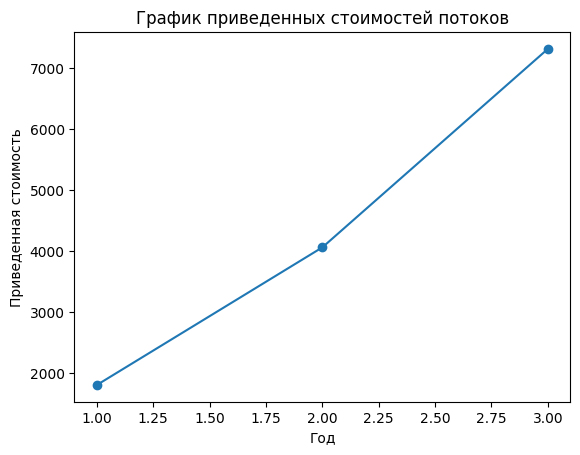

Приведенные стоимости потоков:
Год 1 : 1801.8
Год 2 : 4058.11
Год 3 : 7311.91


In [78]:

import matplotlib.pyplot as plt

cashflows = [2000, 5000, 10000]  # годовые потоки денежных средств

discount_rate = 0.11  # ставка дисконтирования

present_values = []  # список для хранения приведенных стоимостей потоков

for i in range(len(cashflows)):
    present_value = cashflows[i] / (1 + discount_rate) ** (i+1)
    present_values.append(present_value)

# Построение графика приведенных стоимостей потоков
years = range(1, len(cashflows) + 1)

plt.plot(years, present_values, marker='o')
plt.xlabel('Год')
plt.ylabel('Приведенная стоимость')
plt.title('График приведенных стоимостей потоков')
plt.show()

print("Приведенные стоимости потоков:")
for i in range(len(present_values)):
    print("Год", i+1, ":", round(present_values[i], 2))



*Задача 5. Что выгодней: положить деньги на депозит под 11% годовых с ежемесячной капитализацией или на депозит под 11,5% с ежегодной капитализацией процентов?*

Для решения этой задачи, мы можем использовать формулу сложного процента:

`A = P * (1 + r/n)^(n*t)`,

где:
- A - общая сумма, которая будет накоплена
- P - начальный депозит (например 1000 рублей)
- r - годовая процентная ставка (0.11 для первого депозита и 0.115 для второго)
- n - количество капитализации в год (12 для первого депозита и 1 для второго)
- t - срок вклада в годах (мы рассмотрим 5 лет)


Общая сумма накопленных денег для первого депозита:  1728.92
Общая сумма накопленных денег для второго депозита:  1723.35


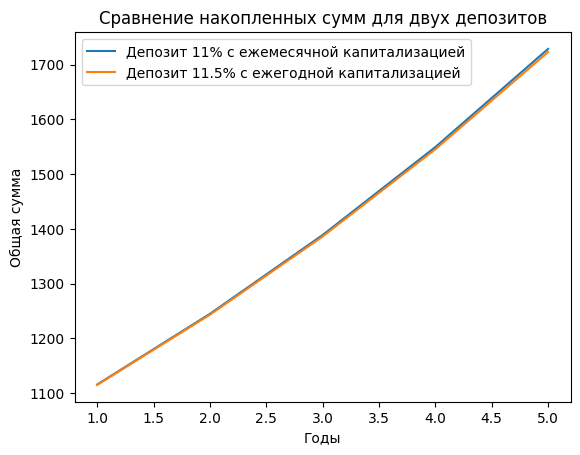

In [79]:

import matplotlib.pyplot as plt

def calculate_total_amount(principal, rate, capitalization_frequency, time):
    total_amount = principal * (1 + rate/capitalization_frequency)**(capitalization_frequency*time)
    return total_amount

principal = 1000
rate1 = 0.11
rate2 = 0.115
capitalization_frequency1 = 12
capitalization_frequency2 = 1
time = 5

total_amount1 = calculate_total_amount(principal, rate1, capitalization_frequency1, time)
total_amount2 = calculate_total_amount(principal, rate2, capitalization_frequency2, time)

print("Общая сумма накопленных денег для первого депозита: ", round(total_amount1, 2))
print("Общая сумма накопленных денег для второго депозита: ", round(total_amount2, 2))

years = list(range(1, time+1))
amounts1 = [calculate_total_amount(principal, rate1, capitalization_frequency1, year) for year in years]
amounts2 = [calculate_total_amount(principal, rate2, capitalization_frequency2, year) for year in years]

plt.plot(years, amounts1, label="Депозит 11% с ежемесячной капитализацией")
plt.plot(years, amounts2, label="Депозит 11.5% с ежегодной капитализацией")
plt.xlabel("Годы")
plt.ylabel("Общая сумма")
plt.title("Сравнение накопленных сумм для двух депозитов")
plt.legend()
plt.show()



*Вывод: Исходя из расчетов и графика, мы видим, что депозит с ежемесячной капитализацией и процентной ставкой 11% годовых выгоднее, чем депозит с ежегодной капитализацией и процентной ставкой 11,5% годовых. Общая сумма накопленных денег для первого варианта составляет больше, чем для второго варианта.*